<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/04pln/clase_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Revisión proyectos 04pln

# Ensayo con https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import gensim
import pyLDAvis.gensim
from gensim import corpora
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
!pip install gensim pyLDAvis nltk scikit-learn


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar dataset JSON
df = pd.read_json("/content/Sarcasm_Headlines_Dataset.json", lines=True)
df = df[['headline', 'is_sarcastic']]

print(df.head())
print(df['is_sarcastic'].value_counts())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                            headline  is_sarcastic
0  former versace store clerk sues over secret 'b...             0
1  the 'roseanne' revival catches up to our thorn...             0
2  mom starting to fear son's web series closest ...             1
3  boehner just wants wife to listen, not come up...             1
4  j.k. rowling wishes snape happy birthday in th...             0
is_sarcastic
0    14985
1    11724
Name: count, dtype: int64


In [6]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return tokens

df['tokens'] = df['headline'].apply(clean_text)
print(df['tokens'].head())


0    [former, versace, store, clerk, sue, secret, b...
1    [roseanne, revival, catch, thorny, political, ...
2    [mom, starting, fear, son, web, series, closes...
3    [boehner, want, wife, listen, come, alternativ...
4    [jk, rowling, wish, snape, happy, birthday, ma...
Name: tokens, dtype: object


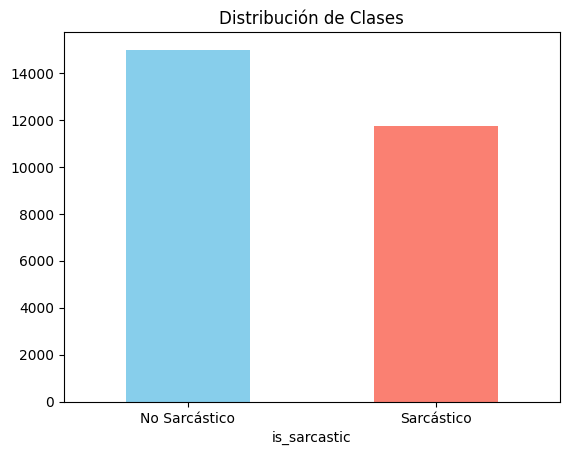

In [8]:
import matplotlib.pyplot as plt

df['is_sarcastic'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks([0,1], ['No Sarcástico', 'Sarcástico'], rotation=0)
plt.title("Distribución de Clases")
plt.show()


In [9]:
# Diccionario y corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Entrenar LDA
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=5,
                                   random_state=42,
                                   passes=10)

# Mostrar tópicos
for idx, topic in lda_model.print_topics(-1):
    print(f"Tema {idx}: {topic}")

# Visualización
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis


Tema 0: 0.011*"house" + 0.009*"white" + 0.005*"u" + 0.005*"new" + 0.004*"congress" + 0.004*"medium" + 0.004*"gun" + 0.004*"cant" + 0.004*"state" + 0.003*"pope"
Tema 1: 0.019*"man" + 0.011*"area" + 0.011*"new" + 0.009*"woman" + 0.008*"school" + 0.008*"like" + 0.006*"year" + 0.006*"yearold" + 0.005*"first" + 0.005*"look"
Tema 2: 0.008*"new" + 0.006*"man" + 0.005*"make" + 0.005*"best" + 0.005*"week" + 0.005*"one" + 0.005*"need" + 0.004*"dad" + 0.004*"know" + 0.004*"get"
Tema 3: 0.032*"trump" + 0.011*"donald" + 0.007*"clinton" + 0.006*"american" + 0.006*"say" + 0.006*"new" + 0.005*"report" + 0.004*"change" + 0.004*"court" + 0.004*"gop"
Tema 4: 0.007*"new" + 0.005*"man" + 0.005*"u" + 0.005*"trump" + 0.004*"people" + 0.004*"death" + 0.004*"obama" + 0.004*"police" + 0.004*"last" + 0.004*"finally"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.082054  0.040786       1        1  22.240450
1      0.097555  0.091073       2        1  21.814433
2      0.112634  0.076281       3        1  20.053573
4     -0.004354 -0.284778       4        1  18.645940
0     -0.287889  0.076638       5        1  17.245605, topic_info=       Term         Freq        Total Category  logprob  loglift
70    trump  1473.000000  1473.000000  Default  30.0000  30.0000
430    area   448.000000   448.000000  Default  29.0000  29.0000
337  donald   437.000000   437.000000  Default  28.0000  28.0000
166   house   352.000000   352.000000  Default  27.0000  27.0000
74      man  1220.000000  1220.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
45    world    81.372714   330.836958   Topic5  -5.9795   0.3550
340     say    84.144726   625.422972   Topic5  -5.9461  -0.2483
268    life    76.016289   361.171342   Topic5  -6.0476   0.1992
120    year    72.878973   484.418380   Topic5  -6.0898  -0.1365
74      man    77.470214  1220.670258   Topic5  -6.0287  -0.9996

[293 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
685       4  0.978309         accused
3700      4  0.987714        activist
2873      2  0.986775              ad
2360      4  0.994322  administration
889       3  0.992949          always
...     ...       ...             ...
120       5  0.150696            year
515       2  0.997234         yearold
1218      2  0.240521            york
1218      3  0.721563            york
1218      4  0.042950            york

[398 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 5, 1])

In [10]:
# Entrenar Word2Vec
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=4)

# Función para obtener vector promedio
def vectorize(tokens):
    vectors = [w2v_model.wv[w] for w in tokens if w in w2v_model.wv]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

X = np.array([vectorize(tokens) for tokens in df['tokens']])
y = df['is_sarcastic']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clasificador
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("=== Word2Vec Logistic Regression ===")
print(classification_report(y_test, y_pred))


=== Word2Vec Logistic Regression ===
              precision    recall  f1-score   support

           0       0.61      0.92      0.73      2996
           1       0.71      0.25      0.37      2346

    accuracy                           0.63      5342
   macro avg       0.66      0.58      0.55      5342
weighted avg       0.65      0.63      0.57      5342



In [11]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['headline'])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

clf_tfidf = LogisticRegression(max_iter=1000)
clf_tfidf.fit(X_train, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test)

print("=== TF-IDF Logistic Regression ===")
print(classification_report(y_test, y_pred_tfidf))


=== TF-IDF Logistic Regression ===
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2996
           1       0.83      0.81      0.82      2346

    accuracy                           0.84      5342
   macro avg       0.84      0.84      0.84      5342
weighted avg       0.84      0.84      0.84      5342



In [12]:
!pip install gradio scikit-learn nltk


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')

# Cargar dataset
df = pd.read_json("/content/Sarcasm_Headlines_Dataset.json", lines=True)
df = df[['headline', 'is_sarcastic']]

# Vectorizar
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['headline'])
y = df['is_sarcastic']

# Entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

print("Modelo entrenado ✅")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Modelo entrenado ✅


In [14]:
def predict_sarcasm(sentence):
    X_input = tfidf.transform([sentence])
    pred = clf.predict(X_input)[0]
    prob = clf.predict_proba(X_input)[0][pred]
    label = "Sarcasmo" if pred == 1 else "No Sarcasmo"
    return f"{label} (Confianza: {prob:.2f})"


In [15]:
import gradio as gr

iface = gr.Interface(
    fn=predict_sarcasm,
    inputs=gr.Textbox(lines=2, placeholder="Escribe una oración aquí..."),
    outputs="text",
    title="Detector de Sarcasmo",
    description="Escribe un titular u oración y el modelo dirá si es sarcasmo o no."
)

iface.launch(share=True)


/usr/local/lib/python3.11/dist-packages/websockets/legacy/__init__.py:6: DeprecationWarning: websockets.legacy is deprecated; see https://websockets.readthedocs.io/en/stable/howto/upgrade.html for upgrade instructions
  warnings.warn(  # deprecated in 14.0 - 2024-11-09
/usr/local/lib/python3.11/dist-packages/uvicorn/protocols/websockets/websockets_impl.py:17: DeprecationWarning: websockets.server.WebSocketServerProtocol is deprecated
  from websockets.server import WebSocketServerProtocol


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://56ace3ecb21ceb829e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [16]:
import pandas as pd
import gradio as gr

# DataFrame global para registrar resultados
history_df = pd.DataFrame(columns=["Frase", "Clasificación", "Confianza"])

def predict_sarcasm_and_log(sentence):
    global history_df
    # Transformar la frase con el vectorizador TF-IDF
    X_input = tfidf.transform([sentence])
    pred = clf.predict(X_input)[0]
    prob = clf.predict_proba(X_input)[0][pred]

    # Etiqueta
    label = "Sarcasmo" if pred == 1 else "No Sarcasmo"
    confianza = round(prob, 2)

    # Guardar en el historial
    new_entry = {"Frase": sentence, "Clasificación": label, "Confianza": confianza}
    history_df = pd.concat([history_df, pd.DataFrame([new_entry])], ignore_index=True)

    # Devolver el resultado y el historial
    return f"{label} (Confianza: {confianza})", history_df

# Interfaz de Gradio
iface = gr.Interface(
    fn=predict_sarcasm_and_log,
    inputs=gr.Textbox(lines=2, placeholder="Escribe una oración aquí..."),
    outputs=[
        gr.Textbox(label="Resultado"),
        gr.Dataframe(headers=["Frase", "Clasificación", "Confianza"], wrap=True)
    ],
    title="Detector de Sarcasmo con Historial",
    description="Escribe una frase y guarda el historial de predicciones en una tabla."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://aa401f6b3fadb92340.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
